In [1]:
from sentence_transformers import SentenceTransformer

text_model = SentenceTransformer("pritamdeka/S-BioBert-snli-multinli-stsb")

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/4.32k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

1_Pooling%2Fconfig.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [27]:
from datasets import load_dataset

# test_dataset = load_dataset("jo-mengr/bowel_disease_single")["train"]
dataset_name = "geo_7k_cellxgene_3_5k_pairs"
test_dataset = load_dataset(f"jo-mengr/{dataset_name}")["train"]

In [28]:
from datasets import Dataset

test_dataset = test_dataset.filter(lambda x: x["label"] == 1.0)

In [29]:
from mmcontext.utils import load_test_adata_from_hf_dataset

adata = load_test_adata_from_hf_dataset(test_dataset)

In [30]:
adata.obs["_scvi_batch"] = adata.obs["_scvi_batch"].astype("category")

In [ ]:
text_embeddings = text_model.encode(test_dataset["caption"], show_progress_bar=True)

Batches:   0%|          | 0/99 [00:00<?, ?it/s]

In [32]:
adata.obsm["X_text"] = text_embeddings

<Figure size 800x800 with 0 Axes>

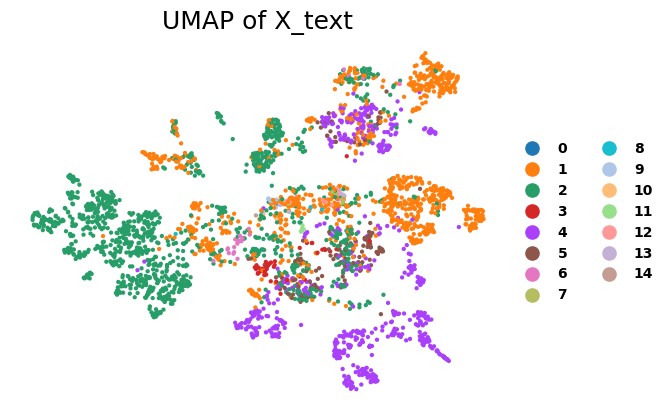

In [37]:
# Visualise the embeddings
from mmcontext.pp.utils import consolidate_low_frequency_categories

from mmcontext.pl import plot_umap

adata_cut = consolidate_low_frequency_categories(adata, ["cell_type"], threshold=10)
label_key = "_scvi_batch"
plot_umap(adata_cut, color_key=label_key, embedding_key="X_text")